Calculate pearson correlation
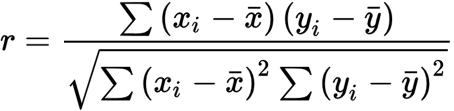

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [9]:
x = np.random.randint(10, size=5)
y = np.random.randint(10, size=5)

coeff, p_value = stats.pearsonr(x, y)
print(x, y)
print(coeff, p_value)

x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

n = sum([(xi-x_mean) * (yi-y_mean) for xi,yi in zip(x,y)])
d = np.sqrt(sum([np.square(xi-x_mean) for xi in x]) * sum([np.square(yi-y_mean) for yi in y]))
coeff = n/d
print(coeff)

[9 1 6 3 0] [9 8 3 5 8]
-0.09149310519375548 0.8836700915058062
-0.09149310519375542


Compute the slope of the line of regression

In [17]:
x = np.random.randint(10, size=5)
y = np.random.randint(10, size=5)

l = stats.linregress(x, y)
l.slope

0.21153846153846154

Here are the test scores of 10 students in physics and history:
```
Physics Scores  15  12  8   8   7   7   7   6   5   3
History Scores  10  25  17  11  13  17  20  13  9   15
```
When a student scores 10 in Physics, what is his probable score in History? Compute the answer correct to one decimal place.

In [25]:
# Use scipy
x = [15, 12, 8, 8, 7, 7, 7, 6, 5, 3]
y = [10, 25, 17, 11, 13, 17, 20, 13, 9, 15]

l = stats.linregress(x, y)
input = 10
pred = l.slope * 10 + l.intercept
print(pred)

# Use sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.reshape(x, newshape=(-1,1)), y)
model.predict([[input]])

15.458333333333332


array([15.45833333])

Document Classification

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# load data
with open('traindata.txt', 'r') as file:
    nlines = file.readline().strip()
    data = [line.strip().split(' ', 1) for line in file.readlines()]

df = pd.DataFrame(data, columns=['label', 'text'])

# convert text data to numeric values and split x_train, y_train
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(df['text'])
y_train = df['label']

# train a classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# load test data
T = 100
df_test = df.sample(n=T)
x_test, y_test = df_test['text'], df_test['label']
x_test = vectorizer.transform(x_test)

# predict
y_pred = model.predict(x_test)

# score: 100* (#correctly categorized - #incorrectly categorized)/(T).
score = 100 * sum(np.where(y_pred == y_test, 1, 0))/T
print(score)


100.0


Which of the test best predict year end GPA?
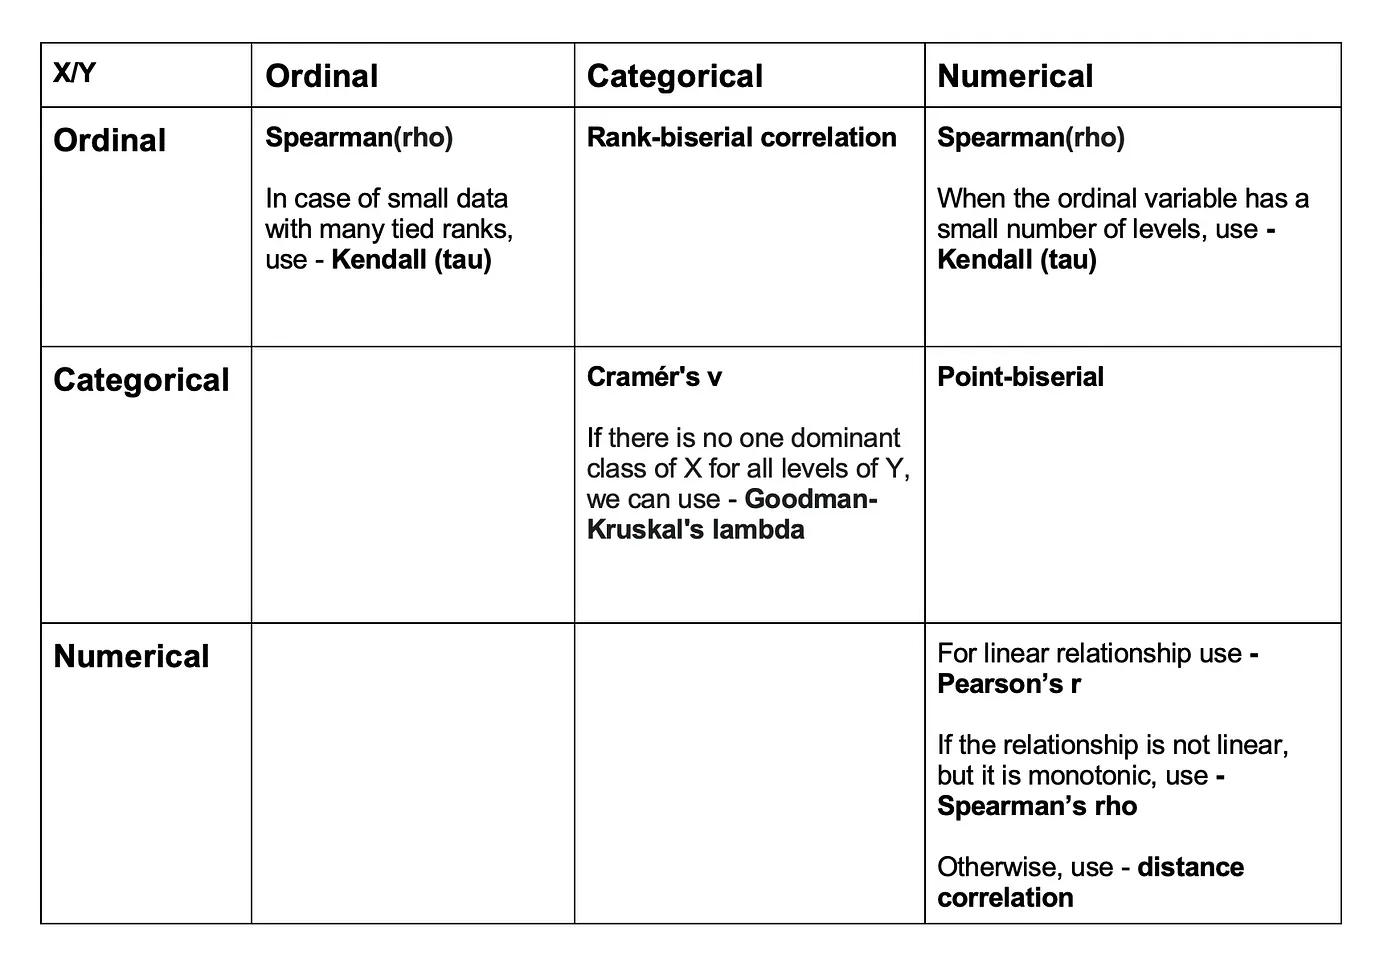

In [42]:
# correlation coefficient based

# expected relationship: linear, monotonic, or else?
# nature of data: numeric vs. categorical? 

# numeric vs. numeric
# pearson correlation
# spearman rank correlation

# categorical vs. categorical
# Goodman - Kruskal’s lambda
# Caramer's v

# ksai coefficient

# model based
# linear regression 
# tree based

In [43]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read input from standard input
n = int(input().strip())
data = [int(input().strip()) for _ in range(n)]

# Create a pandas Series with the data
time_series = pd.Series(data)

# Fit an ARIMA model to the time series data
model = ARIMA(time_series, order=(1, 1, 1))  # Example order, adjust as needed
model_fit = model.fit()

# Forecast the next d days
d = 7  # Example number of days to forecast, adjust as needed
forecast = model_fit.forecast(steps=d)

# Print the forecasted sessions for each day
for session in forecast:
    print(int(round(session)))


TypeError: 'int' object is not callable

In [57]:
def two_sum(nums, target):
    num_map = {}
    for i, num in enumerate(nums):
        num_map[num] = 1
        diff = target - num
        if diff in num_map:
            return [i, num_map[diff]]
    return []

def two_sum_pd(nums, target):
    df = pd.DataFrame({'nums': nums})
    df['index'] = df.index
    df['diff'] = target - df['nums']
    print(df)
    for i in range(len(df)):
        diff = df.loc[i, 'diff']
        print(i, diff)
        if diff in df['nums']:
            return [i, int(df[df['nums']==diff].index.values)]
    return []

nums = [1,2,3]
target = 5
print(two_sum(nums, target))
print(two_sum_pd(nums, target))

[2, 1]
   nums  index  diff
0     1      0     4
1     2      1     3
2     3      2     2
0 4
1 3
2 2
[2, 1]


/var/folders/gz/xs427rt16_d9h4q6bh57pmhh0000gn/T/ipykernel_84442/2320053405.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [i, int(df[df['nums']==diff].index.values)]


In [58]:
def merge_sorted_lists(lst1, lst2):
    return sorted(lst1 + lst2)

lst1 = [1, 2, 3]
lst2 = [1, 5, 6]

merge_sorted_lists(lst1, lst2)

[1, 1, 2, 3, 5, 6]

In [64]:
def is_palindrome(num):
    reversed = str(num)[::-1]
    return str(num) == reversed

num = 121
is_palindrome(num)

True

In [78]:
def len_of_longest_substring(s):
    head = 0
    max_len = 0
    seen = {}
    for i in range(len(s)):
        if s[i] in seen:
            head = seen[s[i]] + 1
        seen[s[i]] = i 
        current_len = i - head + 1
        if current_len > max_len:
            max_len = current_len
        print(i, s[i], head, seen)
    return max_len

s = "abcabcbb"
len_of_longest_substring(s)

0 a 0 {'a': 0}
1 b 0 {'a': 0, 'b': 1}
2 c 0 {'a': 0, 'b': 1, 'c': 2}
3 a 1 {'a': 3, 'b': 1, 'c': 2}
4 b 2 {'a': 3, 'b': 4, 'c': 2}
5 c 3 {'a': 3, 'b': 4, 'c': 5}
6 b 5 {'a': 3, 'b': 6, 'c': 5}
7 b 7 {'a': 3, 'b': 7, 'c': 5}


3

In [101]:
from itertools import combinations

def two_sum(nums, target):
    output = []
    nums = np.array(sorted(nums))
    comb = np.array(list(combinations(range(len(nums)), 2)))
    sums = nums[comb[:,0]] + nums[comb[:,1]]
    indices = np.where(sums==target)[0]
    for i in indices:
        lst = [nums[comb[i,0]], nums[comb[i,1]]]
        if lst not in output:
            output.append(lst)
    return output

def three_sum(nums, target):
    triplets = []
    nums = np.array(sorted(nums))
    comb = np.array(list(combinations(range(len(nums)), 3)))
    sums = nums[comb[:,0]] + nums[comb[:,1]] + nums[comb[:,2]]
    indices = np.where(sums==target)[0]
    for i in indices:
        lst = [nums[comb[i, 0]], nums[comb[i, 1]], nums[comb[i, 2]]]
        if lst not in triplets:
            triplets.append(lst)
    return triplets


nums = [-1, 0, 1, 2, -1, -4]
target = 0
print(two_sum(nums, target))
print(three_sum(nums, target))



[[-1, 1]]
[[-1, -1, 2], [-1, 0, 1]]
